## Import basic libraries for EDA and create DataFrame

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data into dataframe object named 'df'
df = pd.read_csv("KAG_conversion_data.csv")

# Source Codes for Question 1 - EDA demonstration

### Dataset Information gathering

In [ ]:
# Column names, Non-Null value numbers of each column, and data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1143 non-null   object 
 1   gender            1143 non-null   object 
 2   interest          1143 non-null   int64  
 3   Impressions       1143 non-null   int64  
 4   Clicks            1143 non-null   int64  
 5   Spent             1143 non-null   float64
 6   Total_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 62.6+ KB


In [ ]:
# Overall information such as mean, min, max, etc. of the dataset (numerical data only)
df.describe()

,interest,Impressions,Clicks,Spent,Total_Conversion
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000
mean,32.766404,1.867321e+05,33.390201,51.360656,2.855643
std,26.952131,3.127622e+05,56.892438,86.908418,4.483593
min,2.000000,8.700000e+01,0.000000,0.000000,0.000000
25%,16.000000,6.503500e+03,1.000000,1.480000,1.000000
50%,25.000000,5.150900e+04,8.000000,12.370000,1.000000
75%,31.000000,2.217690e+05,37.500000,60.025000,3.000000
max,114.000000,3.052003e+06,421.000000,639.949998,60.000000


In [ ]:
# Numbers of rows and columns in the dataset
df.shape

(1143, 7)

In [ ]:
df.isnull().sum()

age                 0
gender              0
interest            0
Impressions         0
Clicks              0
Spent               0
Total_Conversion    0
dtype: int64

In [ ]:
# data types of each column in the dataset
df.dtypes

age                  object
gender               object
interest              int64
Impressions           int64
Clicks                int64
Spent               float64
Total_Conversion      int64
dtype: object

In [ ]:
# Categorical data exploration with describe() function
categorical_columns = df.select_dtypes(include = "object")
categorical_columns.describe()

,age,gender
count,1143,1143
unique,4,2
top,30-34,M
freq,426,592


In [ ]:
# Check what kind of values are existing in each frequency, for each categorical column
for column in categorical_columns:
    frequency_table = df[column].value_counts()
    print(frequency_table)

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64


### Data Visualization

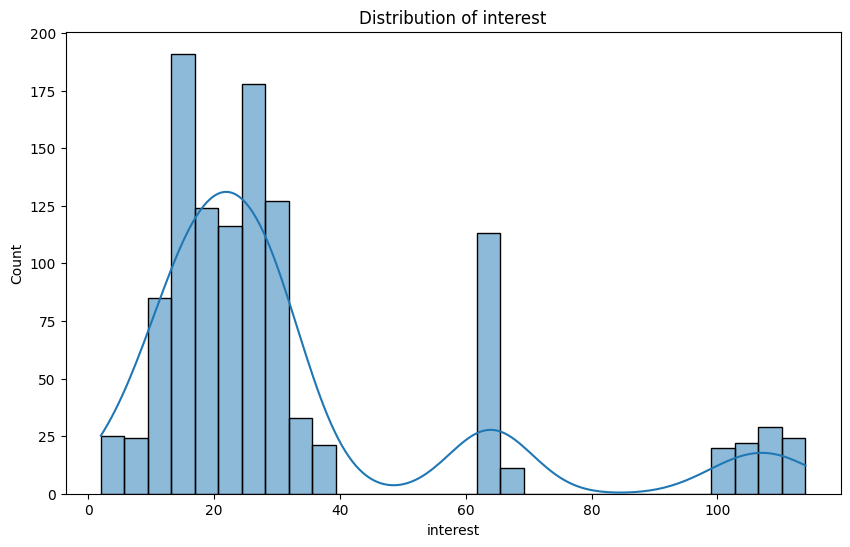

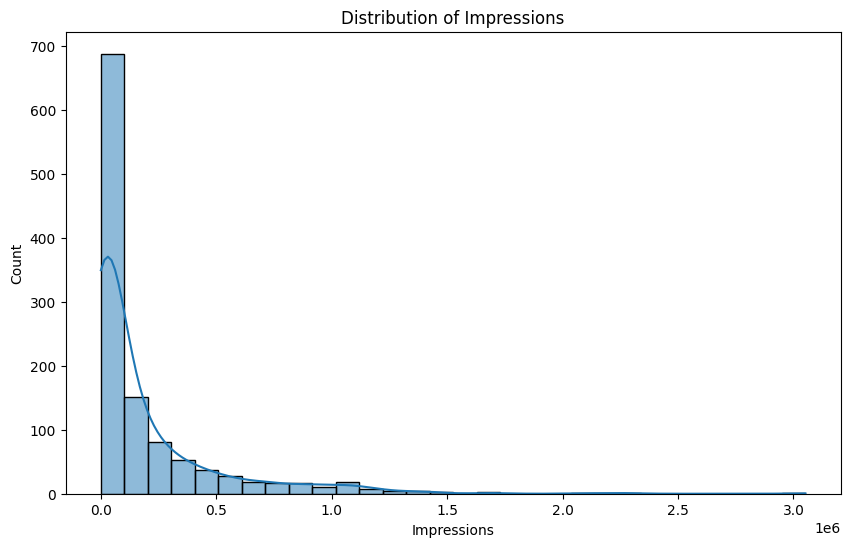

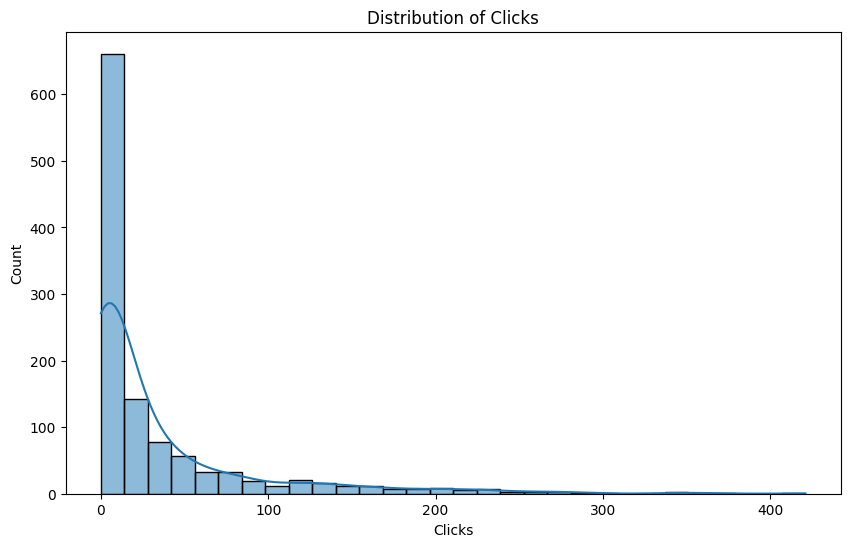

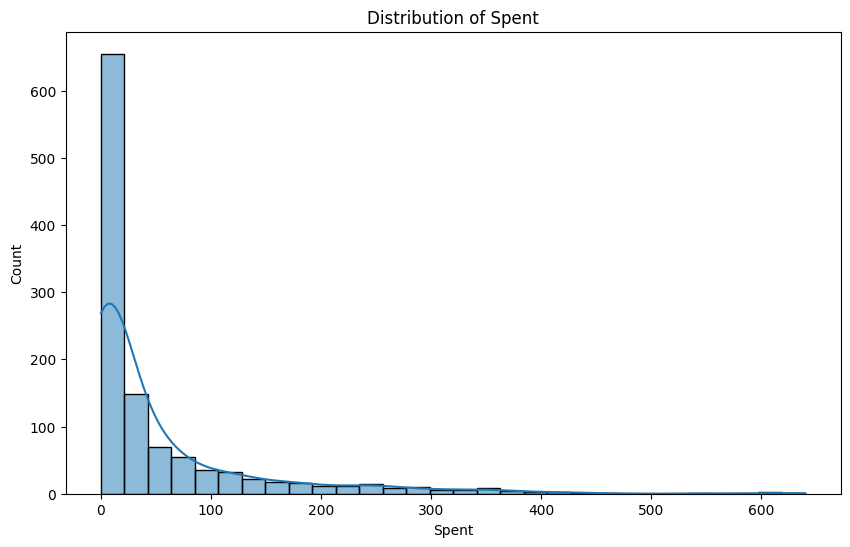

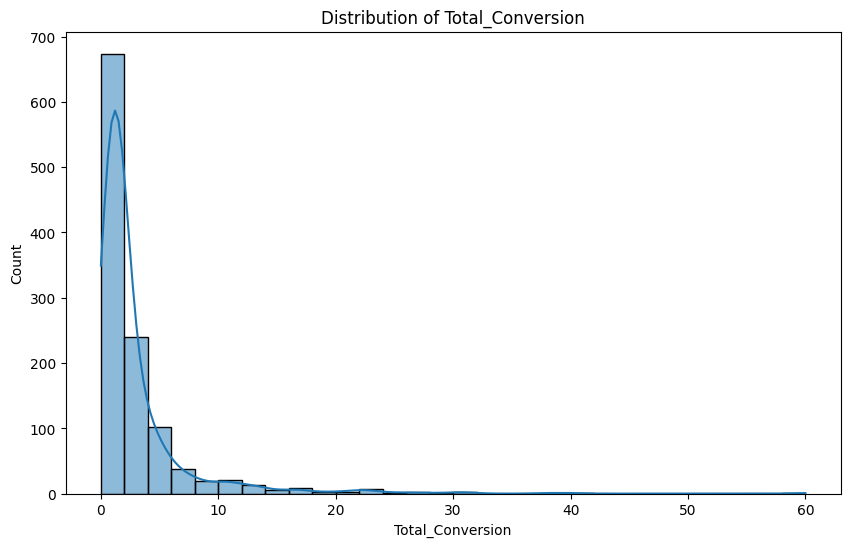

In [ ]:
# 1. Distribution of Numerical Variables
# Histograms for each numeric feature
numeric_features = df.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

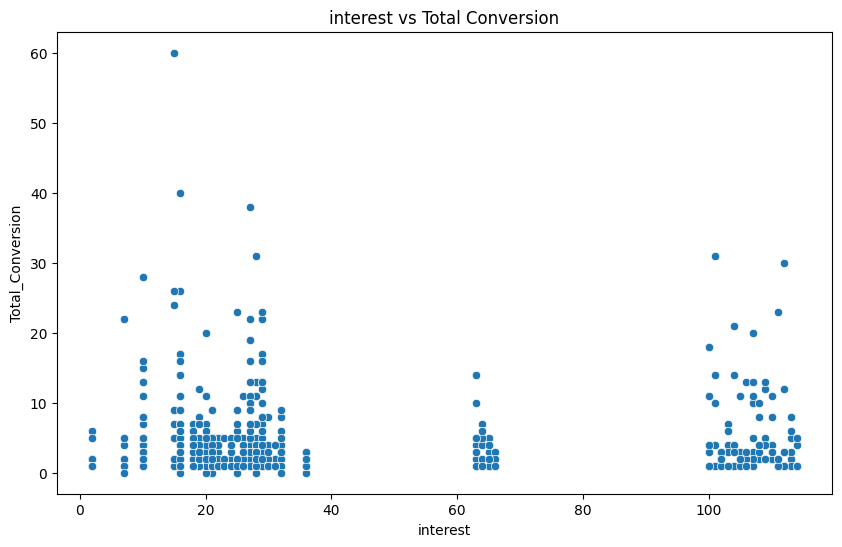

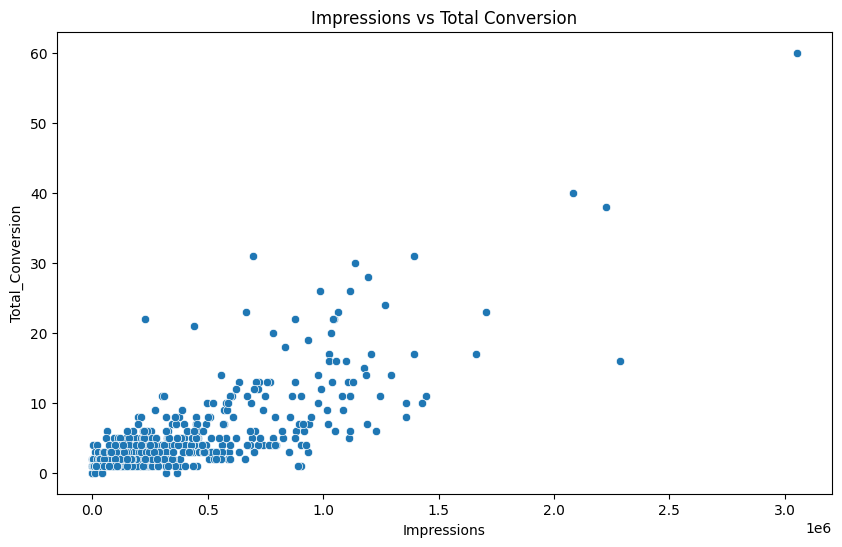

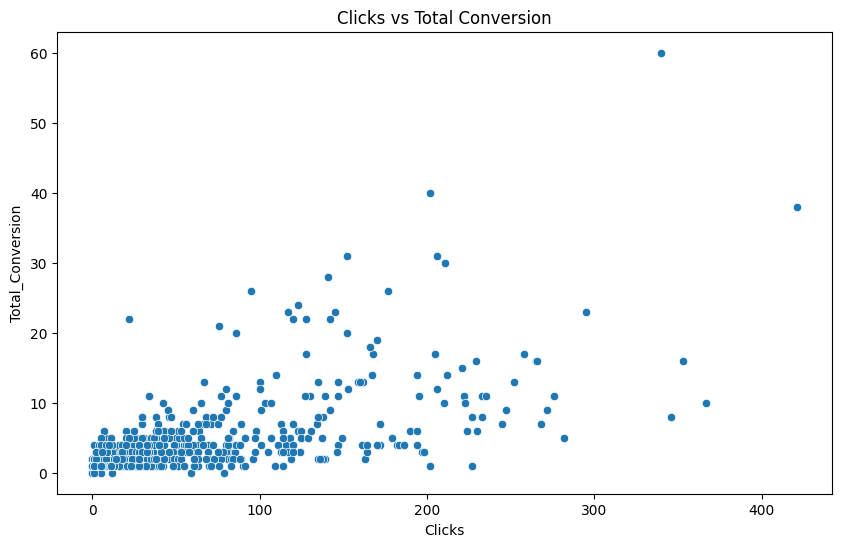

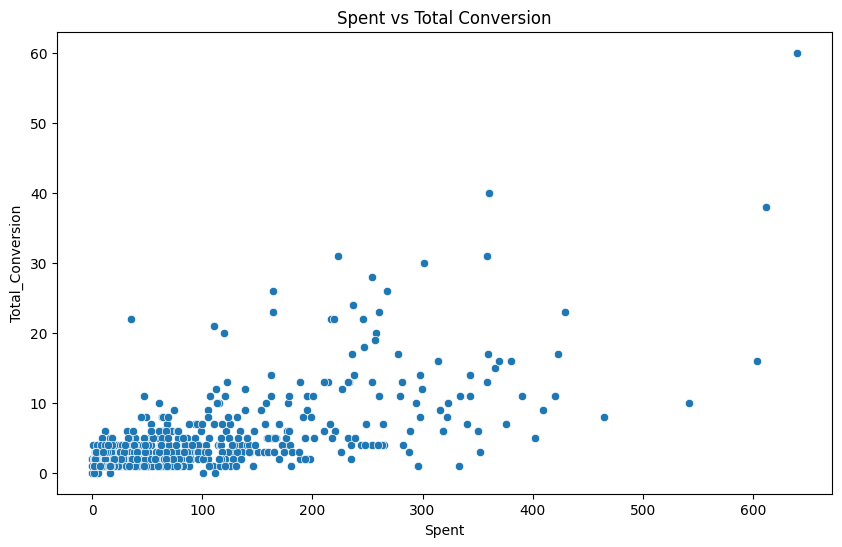

In [ ]:
# 2. Relationship between Numerical Features and Total Conversion
# Scatter plots for numeric features vs Total Conversion
for feature in numeric_features:
    if feature != 'Total_Conversion':
        plt.figure(figsize=(10,6))
        sns.scatterplot(data=df, x=feature, y='Total_Conversion')
        plt.title(f'{feature} vs Total Conversion')
        plt.show()

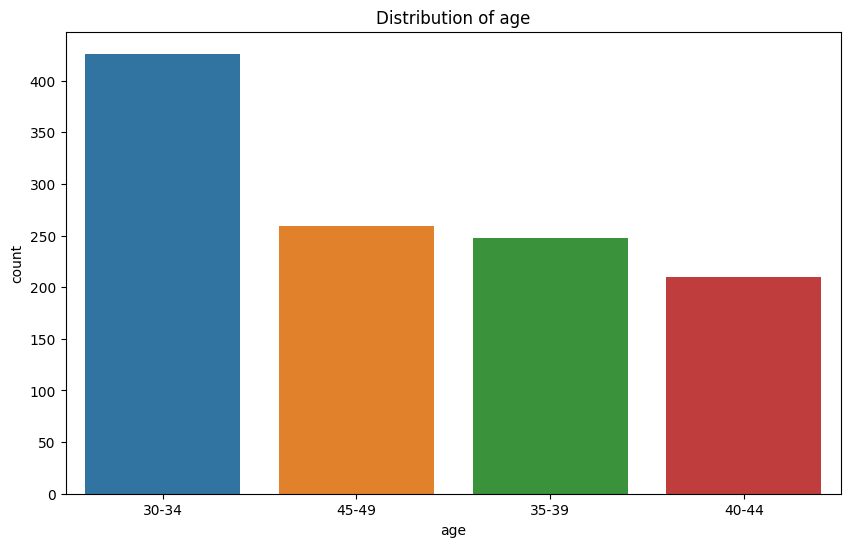

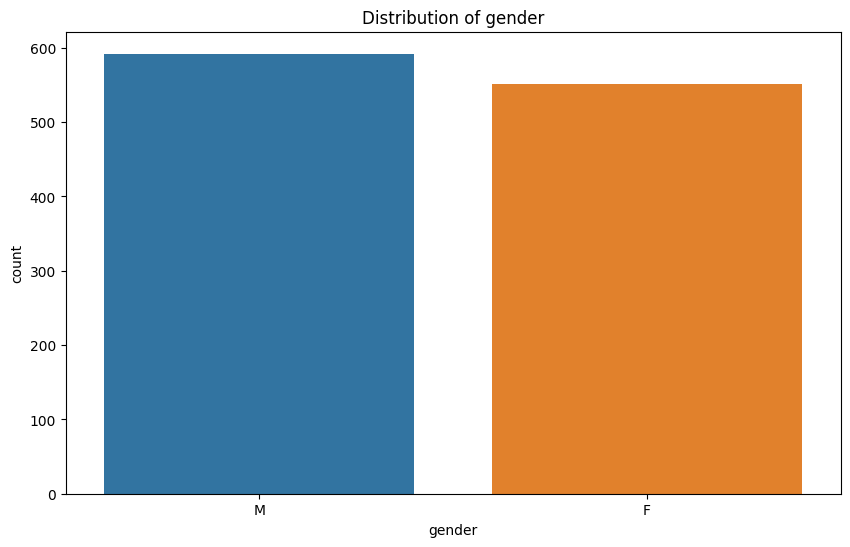

In [ ]:
# 3. Distribution of Categorical Variables
# Bar plots for categorical features (age and gender)
categorical_features = ['age', 'gender']
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()

<ipython-input-35-c822aaa051b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


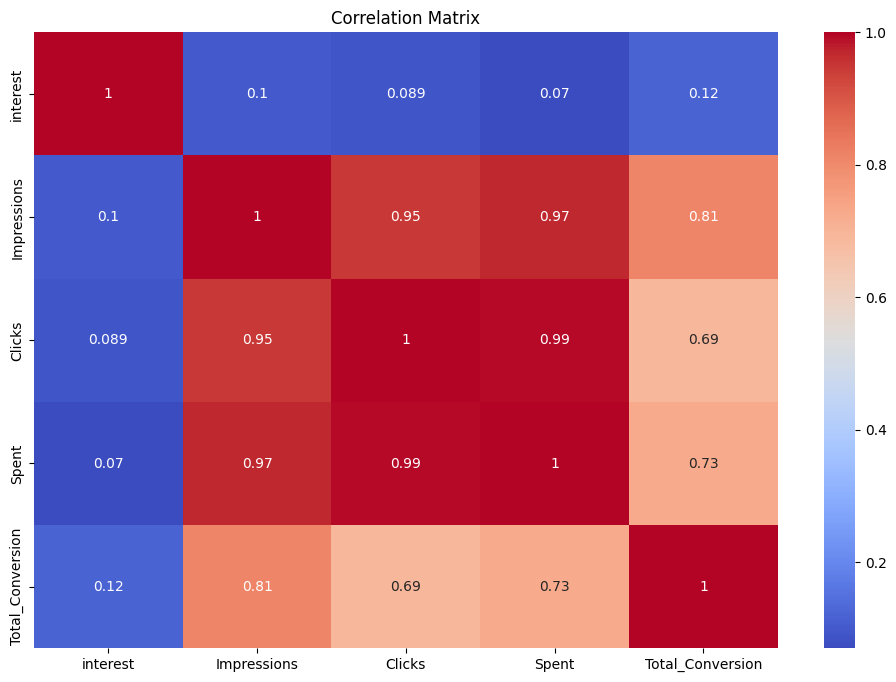

In [ ]:
# 4. Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

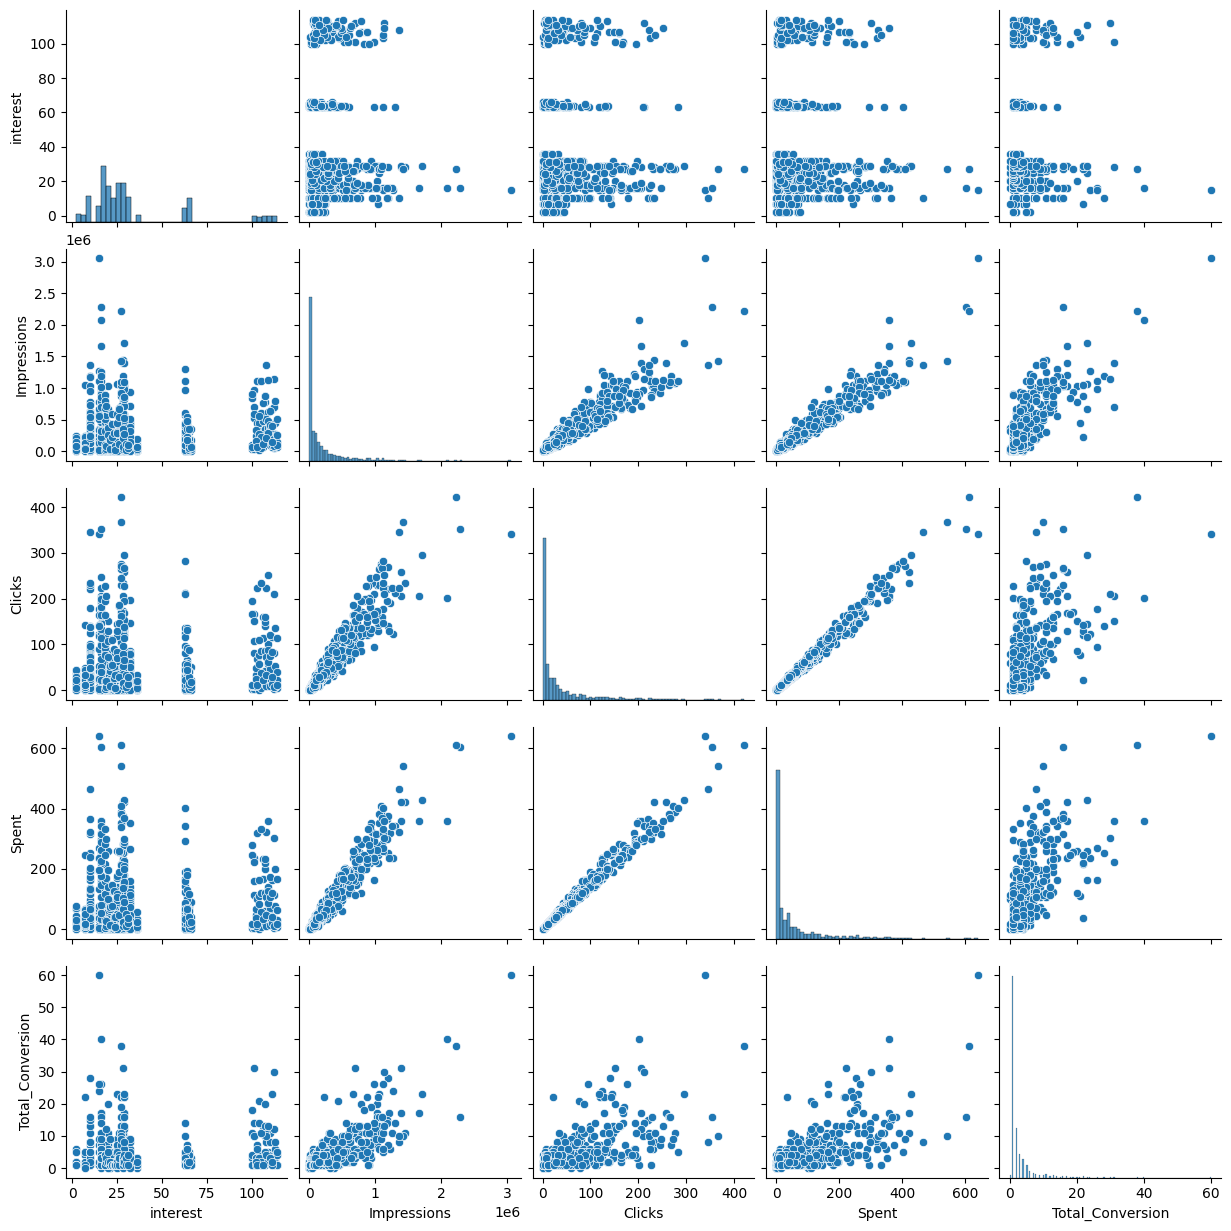

In [ ]:
# 5. Seaborn Pairplot
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show()

### Categorical Data Encoding

In [ ]:
# Import essential libraries and classes for encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

**Label Encoding**

In [ ]:
# Creating an instance of LabelEncoder class
label_encoder = LabelEncoder()

# Creating a deep copy of the dataframe 'df' to avoid modifying the original dataframe
df_le = df.copy()

# Using the LabelEncoder to transform the 'age' column of the dataframe
# This will convert distinct age values into distinct integer labels
df_le["age"] = label_encoder.fit_transform(df["age"])

# Using the LabelEncoder again to transform the 'gender' column of the dataframe
# This will convert distinct gender values into distinct integer labels
df_le["gender"] = label_encoder.fit_transform(df["gender"])

In [ ]:
df_le

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,0,1,15,7350,1,1.430000,2
1,0,1,16,17861,2,1.820000,2
2,0,1,20,693,0,0.000000,1
3,0,1,28,4259,1,1.250000,1
4,0,1,28,4133,1,1.290000,1
...,...,...,...,...,...,...,...
1138,3,0,109,1129773,252,358.189997,13
1139,3,0,110,637549,120,173.880003,3
1140,3,0,111,151531,28,40.289999,2
1141,3,0,113,790253,135,198.710001,8


**One-Hot Encoding**

In [ ]:
# Creating an instance of OneHotEncoder class
one_hot_encoder = OneHotEncoder(sparse=False)

# Creating a deep copy of the dataframe 'df' to avoid modifying the original dataframe
df_ohe = df.copy()

# Using the OneHotEncoder to transform the 'age' column of the dataframe
# This converts each distinct age value into a binary (0 or 1) representation across multiple columns
# The result is a matrix where each column corresponds to a unique age value and rows have a 1 if that age is present, 0 otherwise
df_ohe_encoded = one_hot_encoder.fit_transform(df[['age']])

# Appending the one-hot encoded 'age' columns to the 'df_ohe' dataframe
# The column names for the one-hot encoded data are derived from the categories detected by the encoder
df_ohe = pd.concat([df_ohe, pd.DataFrame(df_ohe_encoded, columns = one_hot_encoder.categories_[0])], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_ohe

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,30-34,35-39,40-44,45-49
0,30-34,M,15,7350,1,1.430000,2,1.0,0.0,0.0,0.0
1,30-34,M,16,17861,2,1.820000,2,1.0,0.0,0.0,0.0
2,30-34,M,20,693,0,0.000000,1,1.0,0.0,0.0,0.0
3,30-34,M,28,4259,1,1.250000,1,1.0,0.0,0.0,0.0
4,30-34,M,28,4133,1,1.290000,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1138,45-49,F,109,1129773,252,358.189997,13,0.0,0.0,0.0,1.0
1139,45-49,F,110,637549,120,173.880003,3,0.0,0.0,0.0,1.0
1140,45-49,F,111,151531,28,40.289999,2,0.0,0.0,0.0,1.0
1141,45-49,F,113,790253,135,198.710001,8,0.0,0.0,0.0,1.0


In [ ]:
# Using the OneHotEncoder to transform the 'gender' column of the dataframe
# This converts each distinct gender value into a binary (0 or 1) representation across multiple columns
# The result is a matrix where each column corresponds to a unique gender value and rows have a 1 if that gender is present, 0 otherwise
df_ohe_encoded = one_hot_encoder.fit_transform(df[['gender']])

# Appending the one-hot encoded 'gender' columns to the 'df_ohe' dataframe
# The column names for the one-hot encoded data are derived from the categories detected by the encoder
df_ohe = pd.concat([df_ohe, pd.DataFrame(df_ohe_encoded, columns = one_hot_encoder.categories_[0])], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_ohe

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,30-34,35-39,40-44,45-49,F,M
0,30-34,M,15,7350,1,1.430000,2,1.0,0.0,0.0,0.0,0.0,1.0
1,30-34,M,16,17861,2,1.820000,2,1.0,0.0,0.0,0.0,0.0,1.0
2,30-34,M,20,693,0,0.000000,1,1.0,0.0,0.0,0.0,0.0,1.0
3,30-34,M,28,4259,1,1.250000,1,1.0,0.0,0.0,0.0,0.0,1.0
4,30-34,M,28,4133,1,1.290000,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,45-49,F,109,1129773,252,358.189997,13,0.0,0.0,0.0,1.0,1.0,0.0
1139,45-49,F,110,637549,120,173.880003,3,0.0,0.0,0.0,1.0,1.0,0.0
1140,45-49,F,111,151531,28,40.289999,2,0.0,0.0,0.0,1.0,1.0,0.0
1141,45-49,F,113,790253,135,198.710001,8,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Since encoding for "age" and "gender" has been done, drop the two categorical columns from the df_ohe object
df_ohe = df_ohe.drop(["age", "gender"], axis = 1)

In [ ]:
df_ohe

,interest,Impressions,Clicks,Spent,Total_Conversion,30-34,35-39,40-44,45-49,F,M
0,15,7350,1,1.430000,2,1.0,0.0,0.0,0.0,0.0,1.0
1,16,17861,2,1.820000,2,1.0,0.0,0.0,0.0,0.0,1.0
2,20,693,0,0.000000,1,1.0,0.0,0.0,0.0,0.0,1.0
3,28,4259,1,1.250000,1,1.0,0.0,0.0,0.0,0.0,1.0
4,28,4133,1,1.290000,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1138,109,1129773,252,358.189997,13,0.0,0.0,0.0,1.0,1.0,0.0
1139,110,637549,120,173.880003,3,0.0,0.0,0.0,1.0,1.0,0.0
1140,111,151531,28,40.289999,2,0.0,0.0,0.0,1.0,1.0,0.0
1141,113,790253,135,198.710001,8,0.0,0.0,0.0,1.0,1.0,0.0


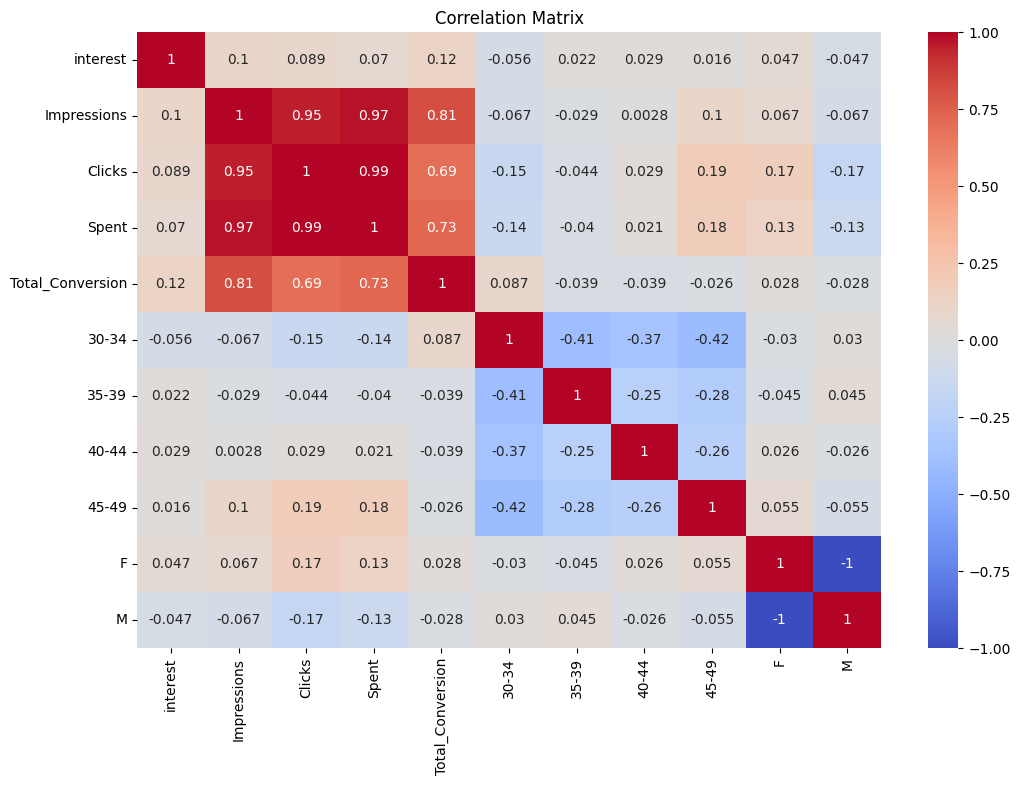

In [ ]:
# Correlation Matrix with the encoded dataset
plt.figure(figsize=(12,8))
sns.heatmap(df_ohe.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Source codes for Question 2 - Build a Linear Regression model and evaluate

In [ ]:
# Import libraries essential in Question 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Splitting the data

# Features for training
X = df_ohe.drop(["interest", "Total_Conversion",
                 "30-34", "35-39", "40-44", "45-49", "F", "M"], axis=1)

# Target Variable
y = df['Total_Conversion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Training the Baseline Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate Coefficient
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coef_df)

# Calculate Intercept
print("Intercept: ", round(model.intercept_, 6))

       Feature  Coefficient
0  Impressions     0.000028
1       Clicks     0.016119
2        Spent    -0.069234
Intercept:  0.710295


In [ ]:
# Evaluate the model with evaluation metrics
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_rmse = round(np.sqrt(baseline_mse), 6)

# Print the output
print(f"Root Mean Squared Error: {baseline_rmse}")

Root Mean Squared Error: 1.866535


### Source Codes for Question 3 - Polynomial Regression model demonstration

In [ ]:
# Import libraries essential in Question 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# 1. Train polynomial regression models with different degrees.
degrees = [1, 2, 3, 4, 5, 6]
models = {}
for degree in degrees:
    pipeline = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
    pipeline.fit(X_train, y_train)
    models[degree] = pipeline

# 2. Evaluate and find the optimal degree for the polynomial regression model.
best_degree = None
best_rmse = float('inf')
for degree, model in models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = round(np.sqrt(mse), 6)

    print(f"Degree {degree} RMSE: {rmse}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_degree = degree

print(f"\nOptimal Degree: {best_degree}")

Degree 1 RMSE: 1.866535
Degree 2 RMSE: 1.856247
Degree 3 RMSE: 1.902026
Degree 4 RMSE: 2.036679
Degree 5 RMSE: 3.11067
Degree 6 RMSE: 5.099685

Optimal Degree: 2


In [ ]:
# 3. Compare the features in the polynomial regression model to the baseline model.
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
poly_features.fit(X_train)
feature_names = poly_features.get_feature_names_out(input_features=X_train.columns)

print(f"Original Features: {X_train.columns.tolist() if hasattr(X_train, 'columns') else 'Column names not available'}")
print(f"\nPolynomial Features (Degree {best_degree}):")
for name in feature_names:
    print(name)

Original Features: ['Impressions', 'Clicks', 'Spent']

Polynomial Features (Degree 2):
Impressions
Clicks
Spent
Impressions^2
Impressions Clicks
Impressions Spent
Clicks^2
Clicks Spent
Spent^2


In [ ]:
# 4. Get the coefficients and intercept for the best model
best_model = models[best_degree]
linear_reg_model = best_model.named_steps['linearregression']

coefficients = linear_reg_model.coef_
intercept = round(linear_reg_model.intercept_, 6)

print("Coefficients for the polynomial model (Degree {best_degree}):")
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef}")

print(f"\nIntercept for the polynomial model (Degree {best_degree}): {intercept}")

Coefficients for the polynomial model (Degree {best_degree}):
Impressions: 1.7664407469466607e-05
Clicks: -0.028190068996303875
Spent: -0.014201752262454771
Impressions^2: 1.746344735487071e-11
Impressions Clicks: -1.9879039017300964e-08
Impressions Spent: -7.498153600620374e-08
Clicks^2: -0.0004506404317774496
Clicks Spent: 0.0009091068192302936
Spent^2: -0.0002901792045515939

Intercept for the polynomial model (Degree 2): 0.949544


In [ ]:
# 5. Compare the performance metrics of the polynomial regression model to the baseline model.
best_model = models[best_degree]
predictions_poly = best_model.predict(X_test)

mse_poly = mean_squared_error(y_test, predictions_poly)
rmse_poly = round(np.sqrt(mse_poly), 6)

print(f"Baseline Regression Metrics: {baseline_rmse}\n")

print(f"Polynomial Regression (Degree {best_degree}) Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_poly}")

if rmse_poly < baseline_rmse:
    improvement = ((baseline_rmse - rmse_poly) / baseline_rmse) * 100
    print(f"\nThe Polynomial Regression model (Degree {best_degree}) performed better by {improvement:.2f}% compared to the Baseline Model.")
else:
    deterioration = ((rmse_poly - baseline_rmse) / baseline_rmse) * 100
    print(f"\nThe Baseline Model performed better by {deterioration:.2f}% compared to the Polynomial Regression model (Degree {best_degree}).")

Baseline Regression Metrics: 1.866535

Polynomial Regression (Degree 2) Metrics:
Root Mean Squared Error (RMSE): 1.856247

The Polynomial Regression model (Degree 2) performed better by 0.55% compared to the Baseline Model.


### Source Codes for Question 4 - Optimize the regression model for predicting total conversion

In [ ]:
# Import libraries essential in Question 4
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a Lasso regression model
lasso = Lasso()

# Define the hyperparameters and their possible values
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000]  # This is added to ensure convergence for some datasets
}

# Grid search with cross-validation
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_parameters_lasso = grid_search_lasso.best_params_
print(f"Best Parameters for Lasso: {best_parameters_lasso}")

# Evaluate the optimized model
lasso_best = Lasso(**best_parameters_lasso)
lasso_best.fit(X_train, y_train)
predictions_optimized_lasso = lasso_best.predict(X_test)

mse_optimized_lasso = mean_squared_error(y_test, predictions_optimized_lasso)
rmse_optimized_lasso = round(np.sqrt(mse_optimized_lasso), 6)

print(f"Optimized Lasso Regression Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized_lasso}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.338e+03, tolerance: 1.374e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.033e+03, tolerance: 1.471e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+03, tolerance: 1.610e

Best Parameters for Lasso: {'alpha': 1, 'fit_intercept': True, 'max_iter': 1000}
Optimized Lasso Regression Metrics:
Root Mean Squared Error (RMSE): 1.872856


In [ ]:
# Create a Ridge regression model
ridge = Ridge()

# Define the hyperparameters and their possible values
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
}

# Grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_parameters = grid_search.best_params_
print(f"Best Parameters: {best_parameters} \n")

# Evaluate the optimized model
ridge_best = Ridge(**best_parameters)
ridge_best.fit(X_train, y_train)
predictions_optimized = ridge_best.predict(X_test)

mse_optimized_ridge = mean_squared_error(y_test, predictions_optimized)
rmse_optimized_ridge = round(np.sqrt(mse_optimized_ridge), 6)

print(f"Baseline Regression Metrics: {baseline_rmse}\n")
print(f"Optimized Ridge Regression Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized_ridge}")

Best Parameters: {'alpha': 1000, 'fit_intercept': True} 

Baseline Regression Metrics: 1.866535

Optimized Ridge Regression Metrics:
Root Mean Squared Error (RMSE): 1.867017
